In [12]:
import pandas as pd #파일불러올 떄
import numpy as np
import matplotlib as mpl #시각화
import matplotlib.pyplot as plt
import seaborn as sns #boxplot등 그래프 그릴 때 필요함
import os #디렉토리
from scipy import stats

import missingno as msno #결측치 확인할 수 있는 패키지
plt.style.use('seaborn')

import warnings #경고 무시하기
warnings.filterwarnings("ignore")

mpl.rcParams['axes.unicode_minus'] = False #마이너스 폰트가 깨지는 것을 방지

%matplotlib inline

# 기본적인 모듈을 import 합니다. 
# mlp.rcParams['axes.unicode_minus'] = False 코드는 그래프에서 마이너스 폰트가 깨지는 문제에 대한 대처입니다.

In [13]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [14]:
df=pd.read_csv('/content/drive/Shareddrives/빅데이터/BeforeCorona/data/df.csv')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157940 entries, 0 to 1157939
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1157940 non-null  int64  
 1   운행일자        1157940 non-null  object 
 2   운행영업일단계     1157940 non-null  object 
 3   주운행선        1157940 non-null  object 
 4   상행하행구분      1157940 non-null  object 
 5   역무열차종       1157940 non-null  object 
 6   정차역         1157940 non-null  object 
 7   메트릭         0 non-null        float64
 8   승차인원수       1157940 non-null  int64  
 9   하차인원수       1157940 non-null  int64  
 10  운행년도        1157940 non-null  object 
 11  운행월         1157940 non-null  object 
 12  운행일         1157940 non-null  object 
 13  place       1157940 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 123.7+ MB


### 운행영업일단계별 철도이용량(코로나 이전 총 이용량)

In [82]:
day=goal.groupby(goal['운행영업일단계'])['하차인원수'].sum()
day=day.reset_index()
day.head()

,운행영업일단계,하차인원수
0,공휴일,310773
1,명절대수송,373414
2,주중,2616083
3,평일,2322141
4,표준,2946232


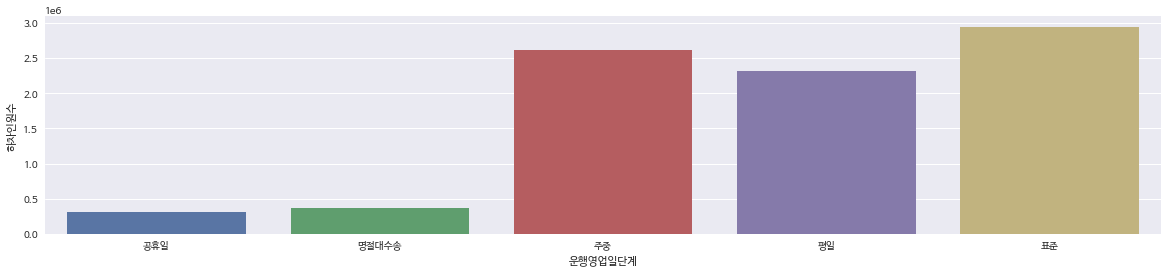

In [83]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = day, y = "하차인원수", x = "운행영업일단계")

In [16]:
'''
강릉=강릉, 정동진
목포=목포, 임성리
전주=전주
'''

'\n\n강릉=강릉, 정동진\n목포=목포, 임성리\n전주=전주\n'

## 1. 코로나 이전 철도량 데이터 역-지역 그룹핑(강릉, 목포, 전주)

In [87]:
#강릉
gg=df[df['정차역']=='강릉']

#정동진
jj=df[df['정차역']=='정동진']

gang=pd.concat([gg,jj], ignore_index=True)
gang['place'] = '강릉'
#gang.head()

In [43]:
gang['하차인원수'].sum() #강릉지역 총 통행량

3532584

In [85]:
#목포
mm=df[df['정차역']=='목포']

#임성리
ii=df[df['정차역']=='임성리']

mok=pd.concat([mm,ii], ignore_index=True)
mok['place'] = '목포'
#mok.head()

In [86]:
#전주
jeon=df[df['정차역']=='전주']
df['place'] = '전주'
#jeon.head()

In [38]:
goal=pd.concat([gang, mok, jeon], ignore_index=True)
goal.head()

,Unnamed: 0,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일,place
0,1504,2018년 01월 01일,공휴일,강릉선,하행,KTX-산천,강릉,NaN,326,326,2018년,01월,01일,강릉
1,1508,2018년 01월 01일,공휴일,강릉선,하행,KTX-호남,강릉,NaN,5188,5188,2018년,01월,01일,강릉
2,1516,2018년 01월 01일,공휴일,강릉선,상행,KTX-산천,강릉,NaN,0,0,2018년,01월,01일,강릉
3,1520,2018년 01월 01일,공휴일,강릉선,상행,KTX-호남,강릉,NaN,0,0,2018년,01월,01일,강릉
4,3088,2018년 01월 02일,주중,강릉선,하행,KTX-호남,강릉,NaN,3610,3610,2018년,01월,02일,강릉


In [99]:
goal.to_csv("/content/drive/Shareddrives/빅데이터/BeforeCorona/data/gangmokjeon.csv", header=True, index=False)

In [61]:
station_result=goal.groupby(goal['place'])['하차인원수'].sum()
station_result=station_result.reset_index()
station_result.head()

,place,하차인원수
0,강릉,3532584
1,목포,1903412
2,전주,3132647


## 2. 강릉, 목포, 전주 이용량분석

### 1) 강릉,목포, 전주 총 이용객수

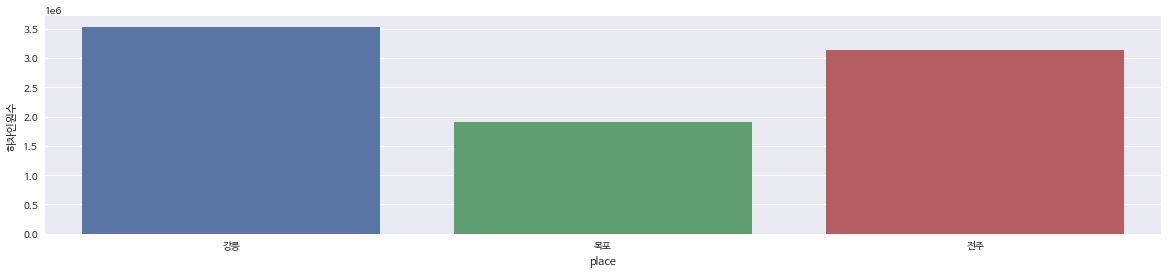

In [62]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = station_result, y = "하차인원수", x = "place")

- 강릉지역의 이용객수가 가장 많았다
- 강릉>전주>목포

### 2) 정차역별 하차인원수(강릉, 목포, 전주)

In [88]:
df1=goal.groupby(['place','정차역'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
print(df1)

  place  정차역    하차인원수
0    강릉   강릉  3262627
1    강릉  정동진   269957
2    목포   목포  1895828
3    목포  임성리     7584
4    전주   전주  3132647


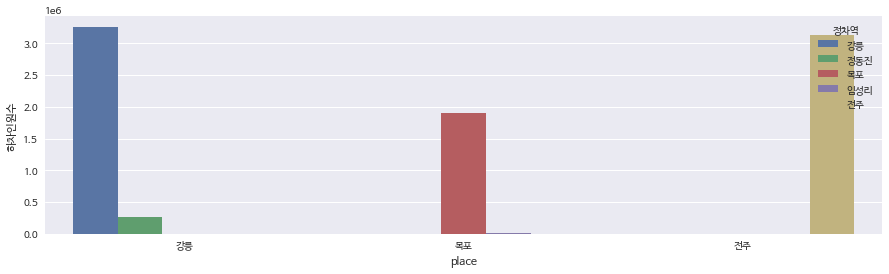

In [90]:
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data = df1, y = "하차인원수", x = "place", hue="정차역")

-강릉지역에서는 강릉역, 목포지역에서는 목포역, 전주지역에서는 전주역이 가장 이용객이 많았다

## 3. 운행일별 승객수(공휴일, 명절, 주중, 평일, 표준)

### 1) 운행영업일별 하차인원수(강릉, 목포, 전주)

In [73]:
df2=goal.groupby(['place','운행영업일단계'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
print(df2)

   place 운행영업일단계    하차인원수
0     강릉     공휴일   132456
1     강릉   명절대수송   151320
2     강릉      주중  1009931
3     강릉      평일   949893
4     강릉      표준  1288984
5     목포     공휴일    61208
6     목포   명절대수송    97252
7     목포      주중   619827
8     목포      평일   533181
9     목포      표준   591944
10    전주     공휴일   117109
11    전주   명절대수송   124842
12    전주      주중   986325
13    전주      평일   839067
14    전주      표준  1065304


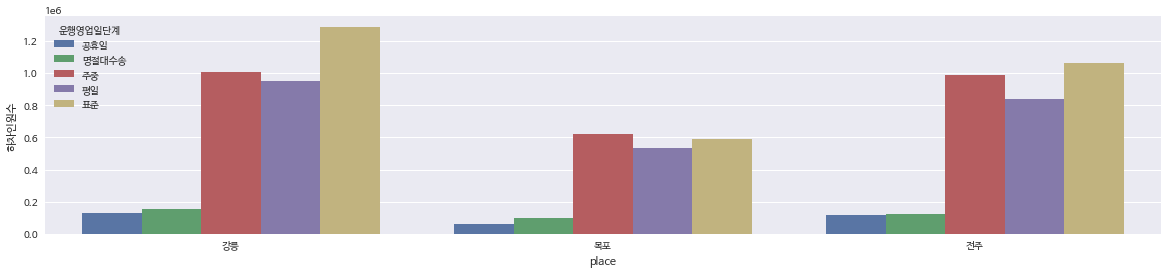

In [74]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = df2, y = "하차인원수", x = "place", hue="운행영업일단계")

- 세 지역 모두 표준과 주중이용량이 제일 많았다.
- 생각보다 공휴일의 이용객수는 많지 않았다.

### 2) 운행영업일별 하차인원수(2018, 2019, 2020)

In [75]:
df3=goal.groupby(['운행년도','운행영업일단계'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
print(df3)

     운행년도 운행영업일단계    하차인원수
0   2018년     공휴일   144008
1   2018년   명절대수송   101429
2   2018년      주중  1123770
3   2018년      평일  1040439
4   2018년      표준  1358434
5   2019년     공휴일   152350
6   2019년   명절대수송   192810
7   2019년      주중  1374328
8   2019년      평일  1197810
9   2019년      표준  1501570
10  2020년     공휴일    14415
11  2020년   명절대수송    79175
12  2020년      주중   117985
13  2020년      평일    83892
14  2020년      표준    86228


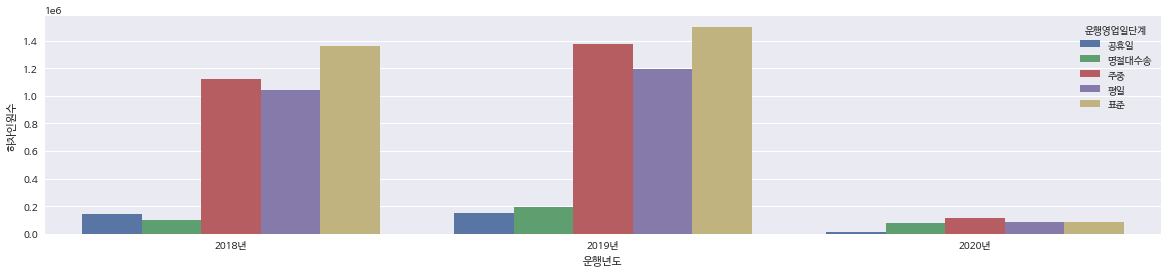

In [77]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = df3, y = "하차인원수", x = "운행년도", hue="운행영업일단계")

- 연도별 분류에서도 표준, 주중 이용객의 수가 가장 많았다.

### 3) 운행월별 하차인원수(2018, 2019, 2020)

In [94]:
df4=goal.groupby(['운행년도','운행월'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
print(df4)

     운행년도  운행월   하차인원수
0   2018년  01월  349937
1   2018년  03월  318594
2   2018년  04월  321658
3   2018년  05월  368438
4   2018년  06월  327424
5   2018년  07월  319222
6   2018년  08월  368449
7   2018년  09월  345502
8   2018년  10월  355437
9   2018년  11월  336392
10  2018년  12월  357027
11  2019년  01월  341003
12  2019년  02월  366747
13  2019년  03월  339195
14  2019년  04월  345346
15  2019년  05월  408853
16  2019년  06월  367974
17  2019년  07월  356617
18  2019년  08월  421596
19  2019년  09월  349026
20  2019년  10월  372313
21  2019년  11월  356832
22  2019년  12월  393366
23  2020년  01월  381695


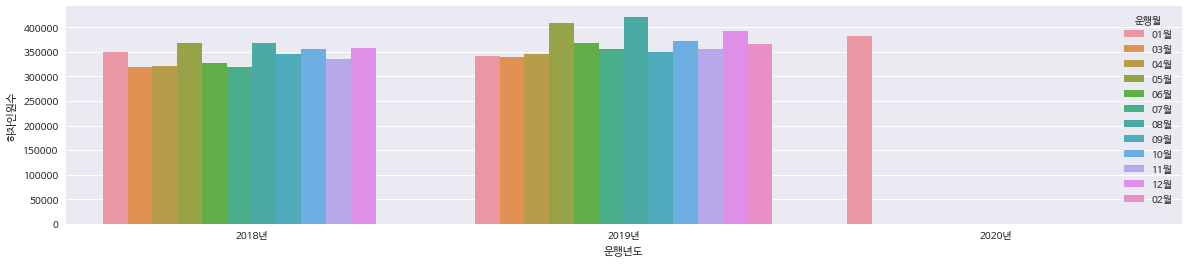

In [95]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = df4, y = "하차인원수", x = "운행년도", hue="운행월")

- 2018년도에는 1월, 4월, 7월의 이용객이 많았다
- 2019년도에는 4월, 7월의 이용객이 많았다

In [97]:
df5=goal.groupby(['place','운행월'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
print(df5)

   place  운행월   하차인원수
0     강릉  01월  474579
1     강릉  02월  157125
2     강릉  03월  259853
3     강릉  04월  258780
4     강릉  05월  308094
5     강릉  06월  290990
6     강릉  07월  282590
7     강릉  08월  364292
8     강릉  09월  271269
9     강릉  10월  283984
10    강릉  11월  263349
11    강릉  12월  317679
12    목포  01월  225251
13    목포  02월   78611
14    목포  03월  147029
15    목포  04월  156629
16    목포  05월  170721
17    목포  06월  150921
18    목포  07월  149054
19    목포  08월  165099
20    목포  09월  166742
21    목포  10월  167843
22    목포  11월  163360
23    목포  12월  162152
24    전주  01월  372805
25    전주  02월  131011
26    전주  03월  250907
27    전주  04월  251595
28    전주  05월  298476
29    전주  06월  253487
30    전주  07월  244195
31    전주  08월  260654
32    전주  09월  256517
33    전주  10월  275923
34    전주  11월  266515
35    전주  12월  270562


###4) 운행월별 하차인원수(강릉, 목포, 전주)

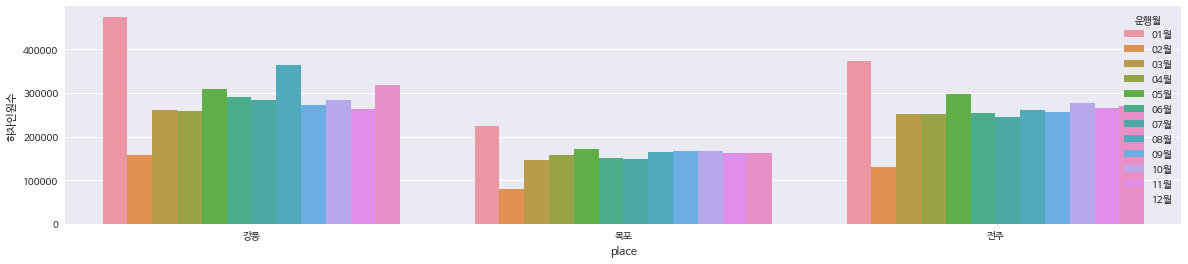

In [98]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = df5, y = "하차인원수", x = "place", hue="운행월")

- 지역별 분류에서는 1월의 이용객이 압도적으로 많았는데 이는 2018, 2019, 2020의 데이터를 합친 것이기 때문으로 해석할 수 있다.
- 강릉의 경우 8월의 이용객이 압도적으로 많았다(364292명) 그외에는 4월과 12월


In [105]:
jj=goal[goal['운행년도']=='2019년']
jj=jj[jj['place']=='전주']

In [106]:
df7=jj.groupby(['운행월'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
print(df7)

    운행월   하차인원수
0   01월  120282
1   02월  131011
2   03월  130382
3   04월  128993
4   05월  150067
5   06월  130371
6   07월  126956
7   08월  137879
8   09월  128290
9   10월  139363
10  11월  135025
11  12월  139847


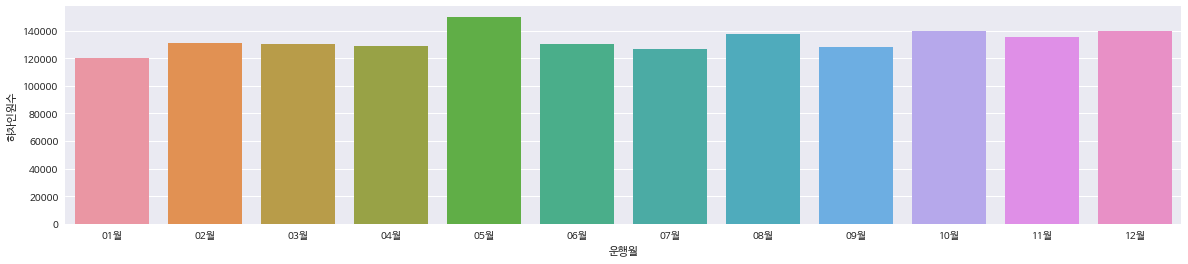

In [108]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = df7, y = "하차인원수", x = "운행월")

- 전주국제영화제

## 4. 축제기간별 승객수